# TD2 : Bayesian linear regression

## 1. Introduction

In [1]:
import numpy as np
import scipy as sp 
import scipy.stats as spst 
import matplotlib.pyplot as plt

## 2. Bayesian linear regression

In [2]:
def model(x, sigm=1):
    f = 3 + 2*x
    noise = spst.norm(0, sigm).rvs(size=x.shape)
    return f + noise

In [3]:
def predGLR(Xpr, Xtr, ytr, Sign, Sigp, alph=0.05):
    # If scalar, define them as matrices
    if len(Xtr.shape) == 1:
        Xtr = Xtr.reshape(-1, 1)
        Xpr = Xpr.reshape(-1, 1)
    # Define the vector as a column vector
    ytr = ytr.reshape(-1, 1)
    # Add the intercept
    Xtr = np.concatenate((np.ones((Xtr.shape[0], 1)), Xtr), axis=1)
    Xpr = np.concatenate((np.ones((Xpr.shape[0], 1)), Xpr), axis=1)
    
    # Compute A matrix
    Sinv = np.linalg.inv(Sign)
    A = Xtr.T @ Sinv @ Xtr + np.linalg.inv(Sigp)
    Ainv = np.linalg.inv(A)

    # Compute average and variance for each new data
    ypr_ave = Xpr @ Ainv @ Xtr.T @ Sinv @ ytr
    ypr_cov = np.diag(Xpr @ Ainv @ Xpr.T).reshape(-1, 1)

    # Compute interval confidence
    ypr_inf, ypr_sup = spst.norm.interval(1 - alph/2, ypr_ave, 
                                          np.sqrt(ypr_cov).reshape(len(ypr_cov), 1))

    return ypr_ave, ypr_cov, ypr_inf, ypr_sup



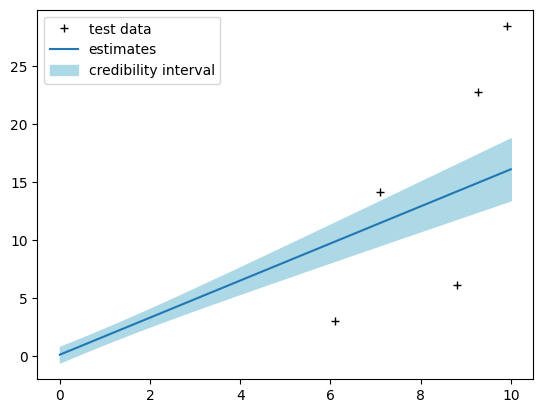

In [4]:
sign = 8

Xtr = spst.uniform(0, 10).rvs(size=5)
ytr = model(Xtr, sign)

Xpr = spst.uniform(0, 10).rvs(size=5)
ypr = model(Xpr, sign)

Sign = np.diag(np.repeat(sign**2, Xtr.shape[0]))
Sigp = np.diag(np.repeat(1, 2))

alph = 0.995

Xpl = np.linspace(0, 10, 100)

ypl_ave, ypl_cov, ypl_inf, ypl_sup = predGLR(Xpl, Xtr, ytr, Sign, Sigp, alph)
ypr_ave, ypr_cov, ypr_inf, ypr_sup = predGLR(Xpr, Xtr, ytr, Sign, Sigp, alph)

fig, ax = plt.subplots()

ax.plot(Xtr, ytr, 'k+', label='test data')
ax.plot(Xpl, ypl_ave, label='estimates')
ax.fill_between(Xpl, ypl_inf.reshape(-1), ypl_sup.reshape(-1),
                color="lightblue", label='credibility interval')

ax.legend()


## 3. Gaussian process regression

### Import des librairies

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C 
from sklearn.gaussian_process.kernels import DotProduct as DP, WhiteKernel as WK 

### Génération du jeu de données non bruitées

In [53]:
def model(x, sign=1):
    f = x * np.cos(x)
    y = f + spst.norm(0,sign).rvs(size=x.shape)
    return y

xtr = spst.uniform(0, 10).rvs(size=20)
ytr = model(xtr, 0)

xpr = spst.uniform(0, 10).rvs(size=20)
ypr = model(xpr, 0)

xpl = np.linspace(0,10,1000)

xtr = xtr.reshape(-1, 1)
xpr = xpr.reshape(-1, 1)
xpl = xpl.reshape(-1, 1)

### Construction du modèle GPR

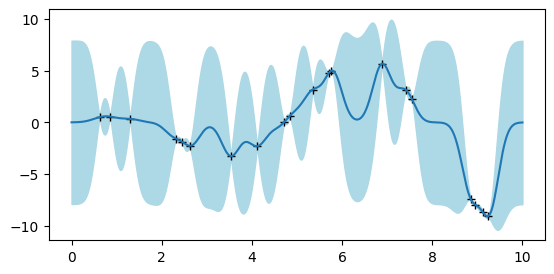

In [55]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha = 0)
GP.fit(xtr, ytr)

ypl_ave, ypl_std = GP.predict(xpl, return_std=True)
# display
fig, ax = plt.subplots()
fig.set_figheight(3)
ax.plot(xtr, ytr, "k+")
ax.plot(xpl, ypl_ave)
ax.fill_between(x=xpl.reshape(-1),
    y1=ypl_ave+spst.norm.ppf(0.025)*ypl_std,
    y2=ypl_ave+spst.norm.ppf(0.975)*ypl_std,
    color='lightblue', interpolate=True)
plt.show()

#### Learning assuming noise free

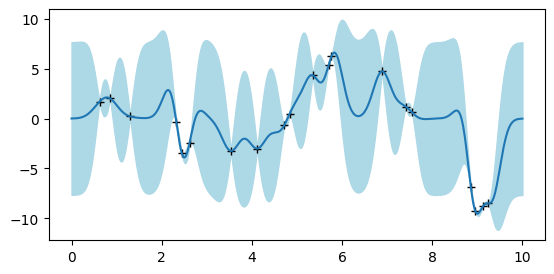

In [56]:
ytr_noi = model(xtr.ravel(), 1)
GP_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha = 0)
GP_2.fit(xtr, ytr_noi)

ypl_ave, ypl_std = GP_2.predict(xpl, return_std=True)
# display
fig, ax = plt.subplots()
fig.set_figheight(3)
ax.plot(xtr, ytr_noi, "k+")
ax.plot(xpl, ypl_ave)
ax.fill_between(x=xpl.reshape(-1),
    y1=ypl_ave+spst.norm.ppf(0.025)*ypl_std,
    y2=ypl_ave+spst.norm.ppf(0.975)*ypl_std,
    color='lightblue', interpolate=True)
plt.show()

#### Learning assuming noise

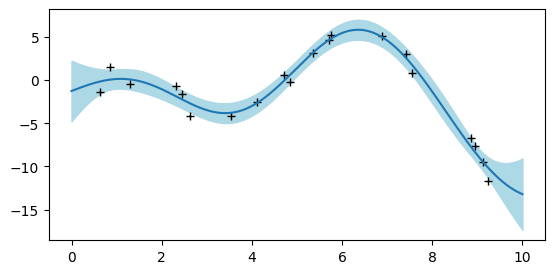

In [57]:
ytr_noi = model(xtr.ravel(), 1)
GP_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha = 1)
GP_2.fit(xtr, ytr_noi)

ypl_ave, ypl_std = GP_2.predict(xpl, return_std=True)
# display
fig, ax = plt.subplots()
fig.set_figheight(3)
ax.plot(xtr, ytr_noi, "k+")
ax.plot(xpl, ypl_ave)
ax.fill_between(x=xpl.reshape(-1),
    y1=ypl_ave+spst.norm.ppf(0.025)*ypl_std,
    y2=ypl_ave+spst.norm.ppf(0.975)*ypl_std,
    color='lightblue', interpolate=True)
plt.show()